C:\Users\adria\AppData\Local\Temp\ipykernel_19820\3917063068.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', period='10y')
[*********************100%***********************]  1 of 1 completed


Tamaño del conjunto de entrenamiento: 2010 días
Tamaño del conjunto de prueba: 503 días

--- Primeras 5 predicciones vs. valores reales ---
                 Actual    Predicted
Date                                
2023-11-01  4317.779785  4237.769148
2023-11-02  4358.339844  4317.599412
2023-11-03  4365.979980  4358.113969
2023-11-06  4378.379883  4365.745535
2023-11-07  4382.779785  4378.131526


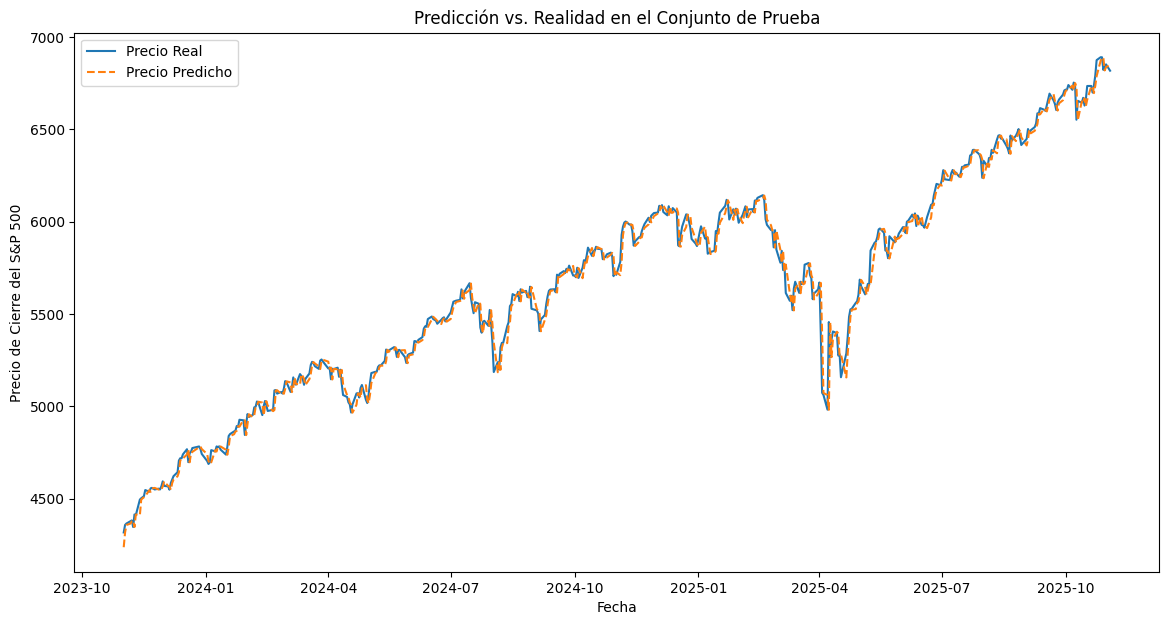


--- Métricas de Error ---
Error Absoluto Medio (MAE): 36.96229346823401
Error Cuadrático Medio (MSE): 3050.6992497525875
Raíz del Error Cuadrático Medio (RMSE): 55.23313543293181


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# --- 1. Adquisición y Preparación de Datos ---

# Descargamos datos del S&P 500
data = yf.download('^GSPC', period='10y')

# Nuestro objetivo: predecir el precio de cierre de mañana.
# Feature (X): Precio de cierre de HOY.
# Label (y): Precio de cierre de MAÑANA.

# Creamos la columna 'Target' (el precio de cierre de mañana)
# Usamos .shift(-1) para desplazar la columna 'Close' un día hacia el futuro
data['Target'] = data['Close'].shift(-1)


# Eliminamos la última fila, ya que no tiene un 'Target' (no sabemos el precio de mañana)
data = data.dropna()


# --- 2. Definición de Features (X) y Target (y) ---

# X debe ser un DataFrame (o array 2D). Por eso usamos [['Close']] con dobles corchetes.
X = data[['Close']] 
y = data['Target']   # y puede ser una Serie

# --- 3. División en Entrenamiento y Prueba (Train/Test Split) ---

# train_test_split baraja los datos por defecto, lo cual NO es correcto para series temporales.
# Usamos shuffle=False para mantener el orden cronológico.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} días")
print(f"Tamaño del conjunto de prueba: {len(X_test)} días")


# --- 4. Entrenamiento del Modelo ---

# 4a. Instanciamos el modelo de Regresión Lineal
model = LinearRegression()

# 4b. Entrenamos el modelo SOLO con los datos de entrenamiento
model.fit(X_train, y_train)


# --- 5. Predicción y Evaluación ---

# 5a. Hacemos predicciones sobre el conjunto de prueba (los datos que el modelo no ha visto)
predictions = model.predict(X_test)

# 5b. Creamos un DataFrame para comparar fácilmente las predicciones con los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("\n--- Primeras 5 predicciones vs. valores reales ---")
print(results_df.head())

# 5c. Visualizamos los resultados
plt.figure(figsize=(14, 7))
plt.plot(results_df['Actual'], label='Precio Real')
plt.plot(results_df['Predicted'], label='Precio Predicho', linestyle='--')
plt.title('Predicción vs. Realidad en el Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre del S&P 500')
plt.legend()
plt.show()

# 5d. Evaluación numérica (veremos más sobre estas métricas en el próximo módulo)
print('\n--- Métricas de Error ---')
print('Error Absoluto Medio (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))